<div class="alert alert-block alert-info" style="background-color: white; text-align: center;">
  <h1> BUSINESS CASE 4: Business Process Predictive Monitoring</h1>
  <h2> Group E _ PART 1</h2>
    
  <p>  </p>
    
  <p> Business Cases for Data Science </p>
  <p> Masters in Data Science Spealization in Business Analytics - 2023/2024 </p>
    
  <p>  </p>
    
  <p><strong style="font-weight: bold;"> Group Members: </strong></p>
  <p> - Duarte Mendes 20230494 <p>
  <p> - Dzmitry Nisht 20230776 <p>
  <p> - Inês Silva 20201580 <p>
  <p> - José Marcal 20201581 <p>
  <p> - Ricardo Sousa 20201611 <p>
    
</div>

### **Table of Contents**

* [1. Notebook Setup](#1)
* [2. Modelling](#2)
    * [2.1. Prefix #1](#2_1)
    * [2.2. Prefix #2](#2_2)
    * [2.3. Prefix #3](#2_3)
    * [2.4. Prefix #4](#2_4)
    * [2.5. Prefix #5](#2_5)
    * [2.6. Prefix #6](#2_6)
    * [2.7. Prefix #7](#2_7)
    * [2.8. Prefix #8](#2_8)
* [3. Recap](#3)

<hr>

<a class="anchor" id="1">

# 1. Notebook Setup: Packages and Module Loading

</a>

In [1]:
# basic imports
import pandas as pd #1.5.3
import numpy as np #1.26.4
import seaborn as sns #0.12.2
import matplotlib.pyplot as plt #3.7.1
from termcolor import colored # base python?

# Modelling
# from sklearn version 1.3.2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

from xgboost import XGBClassifier #2.0.3
from lightgbm import LGBMClassifier #4.3.0
from catboost import CatBoostClassifier 1.2.5

In [2]:
# Custom Functions
%run myimports
import custom_functions as cf

In [3]:
# show all columns // from: https://builtin.com/data-science/pandas-show-all-columns
pd.set_option('display.max_columns', None)

In [4]:
# remove warnings // from: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings # python version
warnings.filterwarnings("ignore")

In [5]:
# List of file names (assuming they are in the same directory)
file_names = ['prefix_1.csv', 'prefix_2.csv', 'prefix_3.csv',
             'prefix_4.csv', 'prefix_5.csv', 'prefix_6.csv', 'prefix_7.csv', 'prefix_8.csv'] 

# Dictionary to store imported datasets
imported_datasets = {}

# Import each CSV file into a DataFrame and store it in the dictionary
for file_name in file_names:
    dataset_name = file_name.split('.')[0]  # Extract dataset name from file name
    dataset = pd.read_csv(file_name)
    imported_datasets[dataset_name] = dataset

# Save in a variable
prefix_1 = imported_datasets['prefix_1']
prefix_2 = imported_datasets['prefix_2']
prefix_3 = imported_datasets['prefix_3']
prefix_4 = imported_datasets['prefix_4']
prefix_5 = imported_datasets['prefix_5']
prefix_6 = imported_datasets['prefix_6']
prefix_7 = imported_datasets['prefix_7']
prefix_8 = imported_datasets['prefix_8']

<hr>

<a class="anchor" id="2">

# 2. Modelling

</a>

In [7]:
# Define a function to evaluate a model
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_valid = model.predict(X_valid)
    train_accuracy = accuracy_score(y_train, predictions_train)
    valid_accuracy = accuracy_score(y_valid, predictions_valid)
    print(f"Training accuracy: {train_accuracy:.4f} VS Validation accuracy: {valid_accuracy:.4f}")
    print("\nClassification Report (Validation Set):")
    print(classification_report(y_valid, predictions_valid))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_valid, predictions_valid))

<hr>

<a class="anchor" id="2_1">

## 2.1. Prefix #1

</a>

In [8]:
# Splitting features and target
X = prefix_1.drop("Outcome", axis=1)
y = prefix_1['Outcome']

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [9]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 1", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 1", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 1", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 1", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 1", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 1", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-1)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 1", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 1", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, silent=True)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 1", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 1
Training accuracy: 1.0000 VS Validation accuracy: 0.6084

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.72      0.75      0.73      2653
           2       0.49      0.48      0.49      4631
           3       0.90      0.88      0.89       635
           4       0.61      0.61      0.61      5813

    accuracy                           0.61     13732
   macro avg       0.68      0.68      0.68     13732
weighted avg       0.61      0.61      0.61     13732


Confusion Matrix:
[[1981  383    6  283]
 [ 427 2243   29 1932]
 [  12   41  557   25]
 [ 319 1896   25 3573]]

RANDOM FOREST MODEL FOR PREFIX 1
Training accuracy: 1.0000 VS Validation accuracy: 0.6598

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.88      0.75      0.81      2653
           2       0.55      0.49      0.52      4631
           3       0.98    

LIGHT GBM FOR PREFIX 1

Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8, 'verbose': -1}

Best cross-validation score: 0.6976

Training accuracy: 0.7026 VS Validation accuracy: 0.6909

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.99      0.73      0.84      2653
           2       0.66      0.36      0.46      4631
           3       1.00      0.91      0.95       635
           4       0.61      0.92      0.73      5813

    accuracy                           0.69     13732
   macro avg       0.81      0.73      0.75     13732
weighted avg       0.72      0.69      0.67     13732


Confuision Matrix:


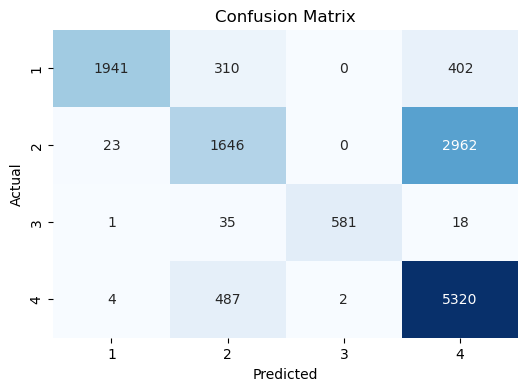

In [10]:
# lIGTH GBM IMPROVEMENT
print(colored("LIGHT GBM FOR PREFIX 1", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_lgb = {
    'learning_rate': [0.01], # 0.1, 0.01
    'n_estimators': [200], # 100, 200
    'max_depth': [10], # 5, 7, 10
    'num_leaves': [31], # 31, 64, 128
    'min_child_samples': [20], # 20, 50, 100
    'subsample': [0.8,], # 0.8, 1.0
    'verbose': [-1]
}

# Initialize the Decision Tree model
clf = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

EXTREME GRADIENT BOOSTING FOR PREFIX 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}

Best cross-validation score: 0.6949

Training accuracy: 0.7023 VS Validation accuracy: 0.6877

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      2653
           1       0.65      0.36      0.47      4631
           2       1.00      0.91      0.95       635
           3       0.61      0.90      0.73      5813

    accuracy                           0.69     13732
   macro avg       0.81      0.73      0.75     13732
weighted avg       0.71      0.69      0.67     13732


Confuision Matrix:


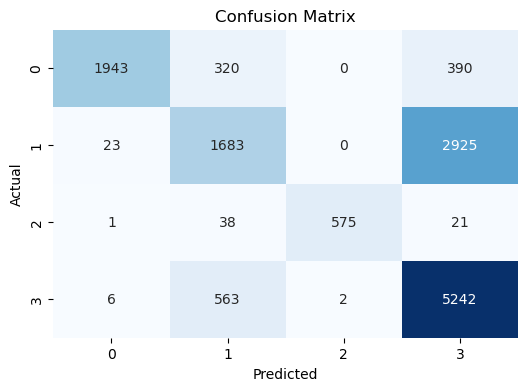

In [11]:
# EXTREME GRADIENT BOOSTING IMPROVEMENT
print(colored("EXTREME GRADIENT BOOSTING FOR PREFIX 1", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1], #0.1, 0.01
    'n_estimators': [100],  #100, 200 
    'max_depth': [5], #5, 7, 10
    'min_child_weight': [5], #1,3, 5
    'gamma': [0.1]# 0, 0.1, 0.2
}

# Initialize the Decision Tree model
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train_adjusted, predictions_train)
valid_accuracy = accuracy_score(y_valid_adjusted, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid_adjusted, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid_adjusted, predictions_valid)

**Predicting Final Outcome before the process is picked up by a team** *[prefix 1]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------|-----------|
| *Light GBM*      |  0.84 | 0.46 | 0.95 | 0.73 | 0.698 | 1.17% |
| *XGBoost*        |  0.84 | 0.47 | 0.95 | 0.73 | 0.695 | 1.46% |


<hr>

<a class="anchor" id="2_2">

## 2.2. Prefix #2

</a>

In [12]:
# Splitting features and target
X = prefix_2.drop("Outcome", axis=1)
y = prefix_2['Outcome']

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [13]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 2", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 2", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 2", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 2", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 2", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 2", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-1)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 2", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 2", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, silent=True)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 2", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 2
Training accuracy: 1.0000 VS Validation accuracy: 0.7199

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.79      0.80      0.79      2653
           2       0.65      0.64      0.64      4631
           3       0.77      0.71      0.73       635
           4       0.74      0.75      0.75      5813

    accuracy                           0.72     13732
   macro avg       0.74      0.72      0.73     13732
weighted avg       0.72      0.72      0.72     13732


Confusion Matrix:
[[2127  342   10  174]
 [ 362 2953   61 1255]
 [  16   85  448   86]
 [ 202 1188   66 4357]]

RANDOM FOREST MODEL FOR PREFIX 2
Training accuracy: 1.0000 VS Validation accuracy: 0.7788

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.95      0.78      0.86      2653
           2       0.72      0.66      0.69      4631
           3       0.98    

EXTREME GRADIENT BOOSTING FOR PREFIX 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200}

Best cross-validation score: 0.7933

Training accuracy: 0.8507 VS Validation accuracy: 0.7906

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2653
           1       0.74      0.67      0.70      4631
           2       0.99      0.92      0.95       635
           3       0.75      0.87      0.81      5813

    accuracy                           0.79     13732
   macro avg       0.86      0.81      0.83     13732
weighted avg       0.80      0.79      0.79     13732


Confuision Matrix:


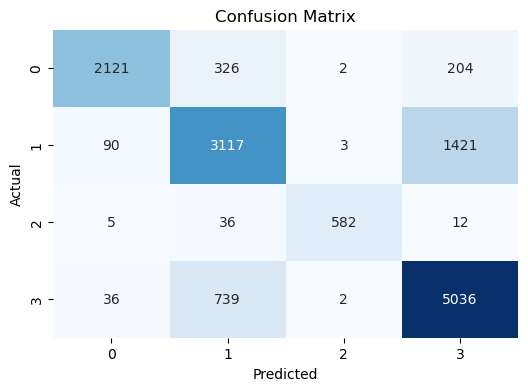

In [14]:
# EXTREME GRADIENT BOOSTING
print(colored("EXTREME GRADIENT BOOSTING FOR PREFIX 2", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1], #0.1, 0.01
    'n_estimators': [200],  #100, 200 
    'max_depth': [7], #5, 7, 10
    'min_child_weight': [3], #1,3, 5
    'gamma': [0.1]# 0, 0.1, 0.2
}

# Initialize the Decision Tree model
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train_adjusted, predictions_train)
valid_accuracy = accuracy_score(y_valid_adjusted, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid_adjusted, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid_adjusted, predictions_valid)

RANDOM FOREST FOR PREFIX 2
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation score: 0.6981

Training accuracy: 0.7022 VS Validation accuracy: 0.6970

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.99      0.73      0.84      2653
           2       0.67      0.38      0.49      4631
           3       0.97      0.91      0.94       635
           4       0.62      0.91      0.74      5813

    accuracy                           0.70     13732
   macro avg       0.81      0.73      0.75     13732
weighted avg       0.72      0.70      0.68     13732


Confuision Matrix:


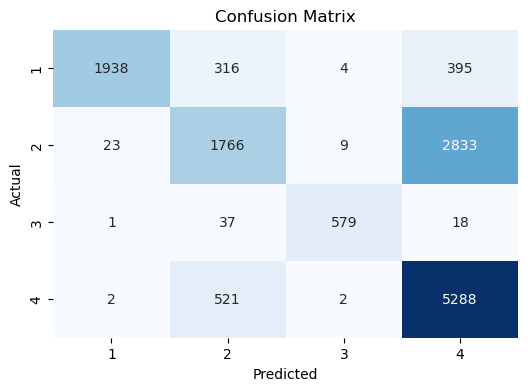

In [15]:
# RANDOM FOREST
print(colored("RANDOM FOREST FOR PREFIX 2", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_rf = {
    'n_estimators': [200],  #100, 200 
    'criterion': ['entropy'], # 'gini', 'entropy'
    'max_depth': [7], #5, 7, 10
    'min_samples_split': [2], # 2, 5, 10
    'min_samples_leaf': [1], # 1, 2, 4
    'max_features': ['sqrt'] # 'auto', 'sqrt', 'log2'
}

# Initialize the Decision Tree model
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_rf, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

**Predicting Final Outcome after first task ended** *[prefix 2]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------|  -----------|
| *XGBoost*        |  0.86 | 0.70 | 0.95 | 0.81 | 0.793 | 6% |
| *Forest Forest*      |  0.84 | 0.49 | 0.94 | 0.74 | 0.698 | 0.52%|

<hr>

<a class="anchor" id="2_3">

## 2.3. Prefix #3

</a>

In [16]:
# Splitting features and target
X = prefix_3.drop("Outcome", axis=1)
y = prefix_3['Outcome']

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [17]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 3", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 3", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 3", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 3", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 3", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 3", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-1)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 3", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 3", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, silent=True)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 3", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 3
Training accuracy: 1.0000 VS Validation accuracy: 0.6895

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.77      0.78      0.77      2653
           2       0.59      0.60      0.60      4631
           3       0.89      0.90      0.89       635
           4       0.71      0.70      0.70      5813

    accuracy                           0.69     13732
   macro avg       0.74      0.74      0.74     13732
weighted avg       0.69      0.69      0.69     13732


Confusion Matrix:
[[2057  361   12  223]
 [ 382 2770   39 1440]
 [   9   41  569   16]
 [ 231 1489   21 4072]]

RANDOM FOREST MODEL FOR PREFIX 3
Training accuracy: 1.0000 VS Validation accuracy: 0.7605

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.75      0.84      2653
           2       0.73      0.57      0.64      4631
           3       0.99    

LIGHT GBM FOR PREFIX 3

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 64, 'subsample': 0.8, 'verbose': -1}

Best cross-validation score: 0.7932

Training accuracy: 0.9312 VS Validation accuracy: 0.7943

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.94      0.79      0.86      2653
           2       0.75      0.67      0.71      4631
           3       0.99      0.92      0.96       635
           4       0.75      0.88      0.81      5813

    accuracy                           0.79     13732
   macro avg       0.86      0.82      0.83     13732
weighted avg       0.80      0.79      0.79     13732


Confuision Matrix:


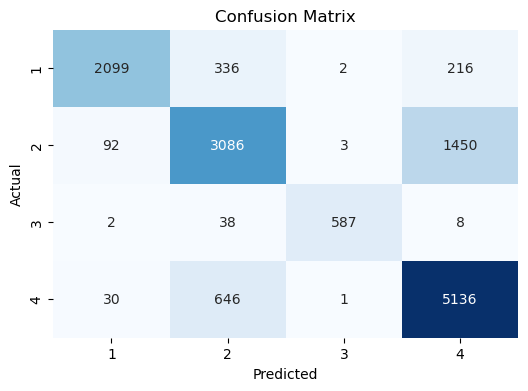

In [18]:
# lIGTH GBM IMPROVEMENT
print(colored("LIGHT GBM FOR PREFIX 3", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_lgb = {
    'learning_rate': [0.1], # 0.1, 0.01
    'n_estimators': [ 200], # 100, 200
    'max_depth': [10], # 5, 7, 10
    'num_leaves': [64], # 31, 64, 128
    'min_child_samples': [20], # 20, 50, 100
    'subsample': [0.8], # 0.8, 1.0
    'verbose': [-1]
}

# Initialize the Decision Tree model
clf = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

EXTREME GRADIENT BOOSTING FOR PREFIX 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200}

Best cross-validation score: 0.7866

Training accuracy: 0.8607 VS Validation accuracy: 0.7853

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2653
           1       0.76      0.63      0.69      4631
           2       0.99      0.93      0.96       635
           3       0.73      0.90      0.81      5813

    accuracy                           0.79     13732
   macro avg       0.86      0.81      0.83     13732
weighted avg       0.80      0.79      0.78     13732


Confuision Matrix:


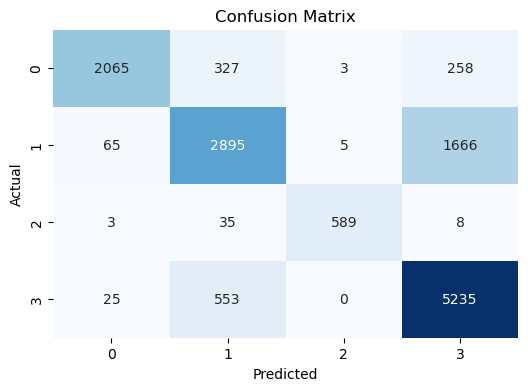

In [19]:
# EXTREME GRADIENT BOOSTING IMPROVEMENT
print(colored("EXTREME GRADIENT BOOSTING FOR PREFIX 3", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1], #0.1, 0.01
    'n_estimators': [200],  #100, 200 
    'max_depth': [7], #5, 7, 10
    'min_child_weight': [5], #1,3, 5
    'gamma': [0.1]# 0, 0.1, 0.2
}

# Initialize the Decision Tree model
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train_adjusted, predictions_train)
valid_accuracy = accuracy_score(y_valid_adjusted, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid_adjusted, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid_adjusted, predictions_valid)

**Predicting Final Outcome after the second task ended** *[prefix 3]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Light GBM*      |  0.86 | 0.71 | 0.96 | 0.81 | 0.793 | 13.7% |
| *XGBoost*        |  0.86 | 0.69 | 0.96 | 0.81 | 0.787 | 7.55% |


<hr>

<a class="anchor" id="2_4">

## 2.4. Prefix #4

</a>

In [20]:
# Splitting features and target
X = prefix_4.drop("Outcome", axis=1)
y = prefix_4['Outcome']

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [21]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 4", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 4", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 4", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 4", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 4", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 4", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-2)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 4", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 4", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, verbose=False)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 4", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 4
Training accuracy: 1.0000 VS Validation accuracy: 0.7361

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.78      0.79      0.79      2826
           2       0.65      0.64      0.64      4555
           3       0.90      0.95      0.92       499
           4       0.77      0.76      0.77      5805

    accuracy                           0.74     13685
   macro avg       0.77      0.79      0.78     13685
weighted avg       0.74      0.74      0.74     13685


Confusion Matrix:
[[2233  430    4  159]
 [ 421 2928   36 1170]
 [   4   11  472   12]
 [ 191 1162   12 4440]]

RANDOM FOREST MODEL FOR PREFIX 4
Training accuracy: 1.0000 VS Validation accuracy: 0.7923

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.77      0.86      2826
           2       0.76      0.63      0.69      4555
           3       0.99    

LIGHT GBM FOR PREFIX 4

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 64, 'subsample': 0.8, 'verbose': -1}

Best cross-validation score: 0.7993

Training accuracy: 0.8214 VS Validation accuracy: 0.7926

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.77      0.86      2826
           2       0.79      0.60      0.68      4555
           3       0.99      0.95      0.97       499
           4       0.73      0.94      0.82      5805

    accuracy                           0.79     13685
   macro avg       0.87      0.82      0.83     13685
weighted avg       0.81      0.79      0.79     13685


Confuision Matrix:


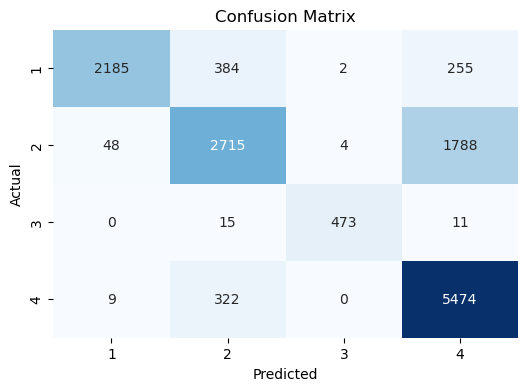

In [22]:
# lIGTH GBM IMPROVEMENT
print(colored("LIGHT GBM FOR PREFIX 4", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_lgb = {
    'learning_rate': [0.1], # 0.1, 0.01
    'n_estimators': [ 100], # 100, 200
    'max_depth': [5], # 5, 7, 10
    'num_leaves': [64], # 31, 64, 128
    'min_child_samples': [20], # 20, 50, 100
    'subsample': [0.8], # 0.8, 1.0
    'verbose': [-1]
}

# Initialize the Decision Tree model
clf = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

EXTREME GRADIENT BOOSTING FOR PREFIX 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200}

Best cross-validation score: 0.8038

Training accuracy: 0.8336 VS Validation accuracy: 0.7991

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2826
           1       0.79      0.62      0.69      4555
           2       0.99      0.95      0.97       499
           3       0.74      0.93      0.82      5805

    accuracy                           0.80     13685
   macro avg       0.87      0.82      0.84     13685
weighted avg       0.81      0.80      0.80     13685


Confuision Matrix:


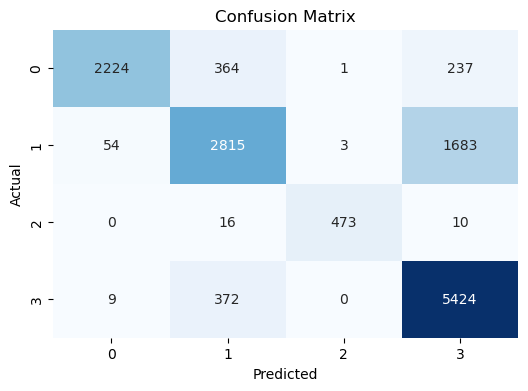

In [23]:
# EXTREME GRADIENT BOOSTING IMPROVEMENT
print(colored("EXTREME GRADIENT BOOSTING FOR PREFIX 4", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1], #0.1, 0.01
    'n_estimators': [200],  #100, 200 
    'max_depth': [5], #5, 7, 10
    'min_child_weight': [3], #1,3, 5
    'gamma': [0.1]# 0, 0.1, 0.2
}

# Initialize the Decision Tree model
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train_adjusted, predictions_train)
valid_accuracy = accuracy_score(y_valid_adjusted, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid_adjusted, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid_adjusted, predictions_valid)

**Predicting Final Outcome after the third task ended** *[prefix 4]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Light GBM*      |  0.86 | 0.68 | 0.97 | 0.82 | 0.799 | 2.88% |
| *XGBoost*        |  0.87 | 0.69 | 0.97 | 0.82 | 0.804 | 3.45% |


<hr>

<a class="anchor" id="2_5">

## 2.5. Prefix #5

</a>

In [24]:
# Splitting features and target
X = prefix_5.drop("Outcome", axis=1)
y = prefix_5['Outcome']

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [25]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 5", attrs=['bold']))
dt_clf = DecisionTreeClassifier()
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 5", attrs=['bold']))
rf_clf = RandomForestClassifier()
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 5", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 5", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 5", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 5", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-2)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 5", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 5", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, verbose=False)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 5", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 5
Training accuracy: 1.0000 VS Validation accuracy: 0.8915

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      2610
           2       0.87      0.86      0.86      4407
           3       0.84      0.82      0.83       170
           4       0.93      0.94      0.94      4663

    accuracy                           0.89     11850
   macro avg       0.87      0.87      0.87     11850
weighted avg       0.89      0.89      0.89     11850


Confusion Matrix:
[[2241  323    9   37]
 [ 338 3790   12  267]
 [   4   15  140   11]
 [  30  234    6 4393]]

RANDOM FOREST MODEL FOR PREFIX 5
Training accuracy: 1.0000 VS Validation accuracy: 0.9247

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.98      0.84      0.91      2610
           2       0.88      0.94      0.91      4407
           3       0.95    

RANDOM FOREST FOR PREFIX 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation score: 0.9052

Training accuracy: 0.9063 VS Validation accuracy: 0.9062

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.99      0.81      0.89      2610
           2       0.81      0.98      0.89      4407
           3       1.00      0.75      0.86       170
           4       0.98      0.90      0.94      4663

    accuracy                           0.91     11850
   macro avg       0.95      0.86      0.89     11850
weighted avg       0.92      0.91      0.91     11850


Confuision Matrix:


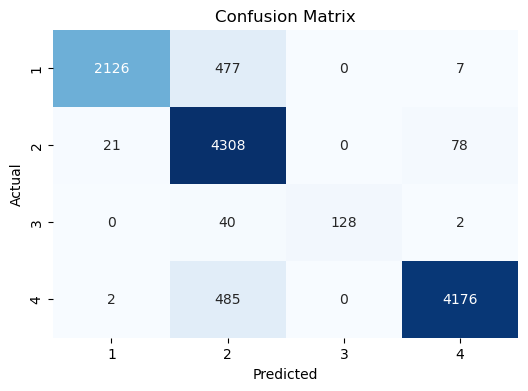

In [26]:
# RANDOM FOREST
print(colored("RANDOM FOREST FOR PREFIX 5", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_rf = {
    'n_estimators': [100],  #100, 200 
    'criterion': ['entropy'], # 'gini', 'entropy'
    'max_depth': [7], #5, 7, 10
    'min_samples_split': [2], # 2, 5, 10
    'min_samples_leaf': [1], # 1, 2, 4
    'max_features': ['sqrt'] # 'auto', 'sqrt', 'log2'
}

# Initialize the Decision Tree model
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

LIGHT GBM FOR PREFIX 5

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 64, 'subsample': 0.8, 'verbose': -1}

Best cross-validation score: 0.9247

Training accuracy: 0.9661 VS Validation accuracy: 0.9286

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.85      0.91      2610
           2       0.89      0.94      0.91      4407
           3       0.96      0.86      0.91       170
           4       0.95      0.96      0.96      4663

    accuracy                           0.93     11850
   macro avg       0.94      0.90      0.92     11850
weighted avg       0.93      0.93      0.93     11850


Confuision Matrix:


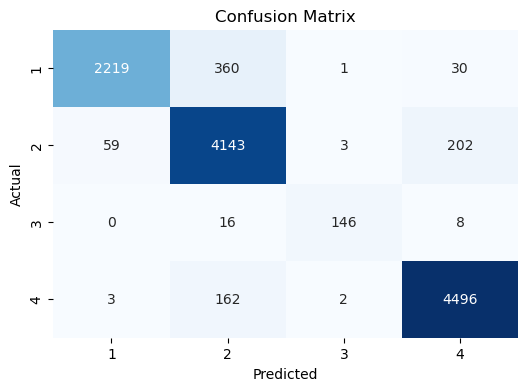

In [27]:
# lIGTH GBM IMPROVEMENT
print(colored("LIGHT GBM FOR PREFIX 5", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_lgb = {
    'learning_rate': [0.1], # 0.1, 0.01
    'n_estimators': [200], # 100, 200
    'max_depth': [5], # 5, 7, 10
    'num_leaves': [64], # 31, 64, 128
    'min_child_samples': [20], # 20, 50, 100
    'subsample': [0.8], # 0.8, 1.0
    'verbose': [-1]
}

# Initialize the Decision Tree model
clf = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

GRADIENT BOOSTING FOR PREFIX 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Best cross-validation score: 0.9191

Training accuracy: 0.9282 VS Validation accuracy: 0.9226

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.99      0.83      0.90      2610
           2       0.87      0.94      0.91      4407
           3       0.91      0.85      0.88       170
           4       0.95      0.96      0.95      4663

    accuracy                           0.92     11850
   macro avg       0.93      0.90      0.91     11850
weighted avg       0.93      0.92      0.92     11850


Confusion Matrix:


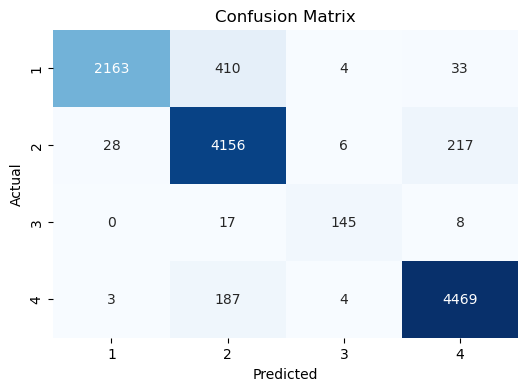

In [28]:
# GRADIENT BOOSTING
print(colored("GRADIENT BOOSTING FOR PREFIX 5", attrs=['bold']))

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'learning_rate': [0.1], # 0.1, 0.01
    'n_estimators': [100], # 100, 200
    'max_depth': [3], # 5, 7, 10
    'min_samples_split': [2], # 2, 5, 10
    'min_samples_leaf': [1], # 1, 2, 4
    'subsample': [0.8] # 0.8, 1.0
}

# Initialize the Gradient Boosting model
clf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfusion Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

**Predicting Final Outcome after the forth task ended** *[prefix 5]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Random Forest*      |  0.89 | 0.89 | 0.86 | 0.94 | 0.905 | ~0% |
| *Light GBM*      |  0.91 | 0.91 | 0.91 | 0.96 | 0.925 | 3.63% |
| *Gradient Boosting*        |  0.90 | 0.91 | 0.88 | 0.95 | 0.919 | 0.05% |


<hr>

<a class="anchor" id="2_6">

## 2.6. Prefix #6

</a>

In [29]:
# Splitting features and target
X = prefix_6.drop("Outcome", axis=1)
y = prefix_6['Outcome']

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [30]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 6", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 6", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 6", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 6", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 6", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 6", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-1)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 6", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 6", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, silent=True)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 6", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 6
Training accuracy: 1.0000 VS Validation accuracy: 0.9136

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.94      0.93      0.94      1858
           2       0.93      0.94      0.93      3197
           3       0.93      0.76      0.83        86
           4       0.77      0.78      0.77       691

    accuracy                           0.91      5832
   macro avg       0.89      0.85      0.87      5832
weighted avg       0.91      0.91      0.91      5832


Confusion Matrix:
[[1734   90    1   33]
 [  85 2993    2  117]
 [   0   14   65    7]
 [  28  125    2  536]]

RANDOM FOREST MODEL FOR PREFIX 6
Training accuracy: 1.0000 VS Validation accuracy: 0.9240

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.99      0.93      0.96      1858
           2       0.92      0.96      0.94      3197
           3       0.94    

RANDOM FOREST FOR PREFIX 6
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best cross-validation score: 0.9193

Training accuracy: 0.9281 VS Validation accuracy: 0.9165

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.93      0.95      1858
           2       0.89      0.98      0.93      3197
           3       0.95      0.66      0.78        86
           4       0.88      0.63      0.73       691

    accuracy                           0.92      5832
   macro avg       0.92      0.80      0.85      5832
weighted avg       0.92      0.92      0.91      5832


Confuision Matrix:


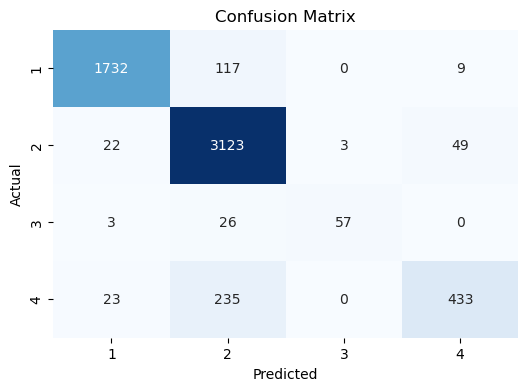

In [31]:
# RANDOM FOREST
print(colored("RANDOM FOREST FOR PREFIX 6", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_rf = {
    'n_estimators': [100],  #100, 200 
    'criterion': ['entropy'], # 'gini', 'entropy'
    'max_depth': [8], #5, 7, 10
    'min_samples_split': [5], # 2, 5, 10
    'min_samples_leaf': [1], # 1, 2, 4
    'max_features': ['sqrt'] # 'auto', 'sqrt', 'log2'
}

# Initialize the Decision Tree model
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

LIGHT GBM FOR PREFIX 6

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 64, 'subsample': 0.8, 'verbose': -1}

Best cross-validation score: 0.9314

Training accuracy: 0.9474 VS Validation accuracy: 0.9280

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.99      0.93      0.96      1858
           2       0.93      0.96      0.94      3197
           3       0.87      0.80      0.84        86
           4       0.79      0.81      0.80       691

    accuracy                           0.93      5832
   macro avg       0.89      0.87      0.88      5832
weighted avg       0.93      0.93      0.93      5832


Confuision Matrix:


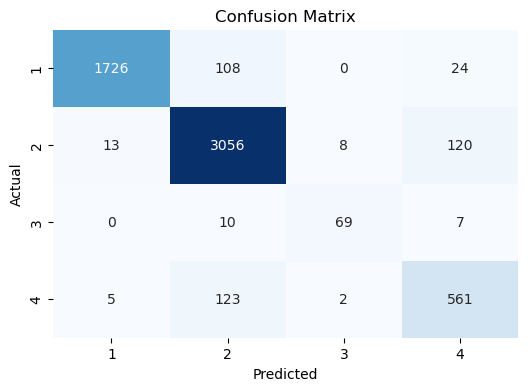

In [32]:
# lIGTH GBM IMPROVEMENT
print(colored("LIGHT GBM FOR PREFIX 6", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_lgb = {
    'learning_rate': [0.1], # 0.1, 0.01
    'n_estimators': [100], # 100, 200
    'max_depth': [3], # 5, 7, 10
    'num_leaves': [64], # 31, 64, 128
    'min_child_samples': [20], # 20, 50, 100
    'subsample': [0.8], # 0.8, 1.0
    'verbose': [-1]
}

# Initialize the Decision Tree model
clf = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

EXTREME GRADIENT BOOSTING FOR PREFIX 6
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100}

Best cross-validation score: 0.9313

Training accuracy: 0.9485 VS Validation accuracy: 0.9295

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1858
           1       0.93      0.96      0.94      3197
           2       0.91      0.90      0.90        86
           3       0.79      0.82      0.80       691

    accuracy                           0.93      5832
   macro avg       0.90      0.90      0.90      5832
weighted avg       0.93      0.93      0.93      5832


Confuision Matrix:


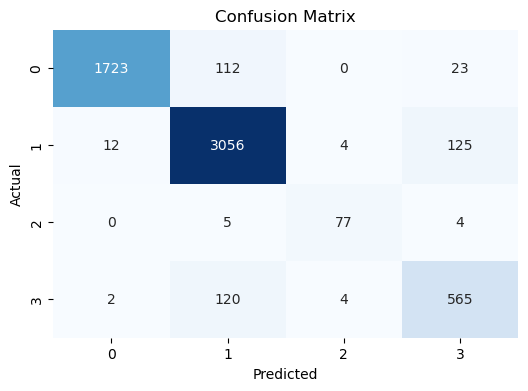

In [33]:
# EXTREME GRADIENT BOOSTING IMPROVEMENT
print(colored("EXTREME GRADIENT BOOSTING FOR PREFIX 6", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1], #0.1, 0.01
    'n_estimators': [100],  #100, 200 
    'max_depth': [4], #5, 7, 10
    'min_child_weight': [1], #1,3, 5
    'gamma': [0.1]# 0, 0.1, 0.2
}

# Initialize the Decision Tree model
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train_adjusted, predictions_train)
valid_accuracy = accuracy_score(y_valid_adjusted, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid_adjusted, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid_adjusted, predictions_valid)

**Predicting Final Outcome after the fifth task ended** *[prefix 6]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Random Forest*      |  0.95 | 0.93 | 0.78 | 0.73 | 0.919 | 1.16% |
| *Light GBM*      |  0.96 | 0.94 | 0.84 | 0.80 | 0.931 | 1.94% |
| *XGBoost*        | 0.96  | 0.94 | 0.90 | 0.80 | 0.931 | 1.90% |


* *Gradient Boosting* showed greate promise for good results, but each iterations takes huge ammounts of time to run, so we sacrifice the possible improvement (small) to faster runs


<hr>

<a class="anchor" id="2_7">

## 2.7. Prefix #7

</a>

In [34]:
# Splitting features and target
X = prefix_7.drop("Outcome", axis=1)  # Features
y = prefix_7['Outcome']     # Target

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [35]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 7", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 7", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 7", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 7", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 7", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 7", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-2)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 7", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 7", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, verbose=False)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 7", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 7
Training accuracy: 1.0000 VS Validation accuracy: 0.7771

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.85      0.80      0.83       492
           2       0.79      0.80      0.79       766
           3       0.53      0.66      0.59        44
           4       0.69      0.71      0.70       340

    accuracy                           0.78      1642
   macro avg       0.71      0.74      0.73      1642
weighted avg       0.78      0.78      0.78      1642


Confusion Matrix:
[[396  73   3  20]
 [ 54 610  17  85]
 [  1  10  29   4]
 [ 16  77   6 241]]

RANDOM FOREST MODEL FOR PREFIX 7
Training accuracy: 1.0000 VS Validation accuracy: 0.8313

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.95      0.80      0.87       492
           2       0.81      0.89      0.85       766
           3       0.73      0.68      0.71

RANDOM FOREST FOR PREFIX 7
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best cross-validation score: 0.8138

Training accuracy: 0.8227 VS Validation accuracy: 0.7887

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.98      0.72      0.83       492
           2       0.69      0.99      0.82       766
           3       1.00      0.50      0.67        44
           4       0.96      0.47      0.63       340

    accuracy                           0.79      1642
   macro avg       0.91      0.67      0.74      1642
weighted avg       0.84      0.79      0.78      1642


Confuision Matrix:


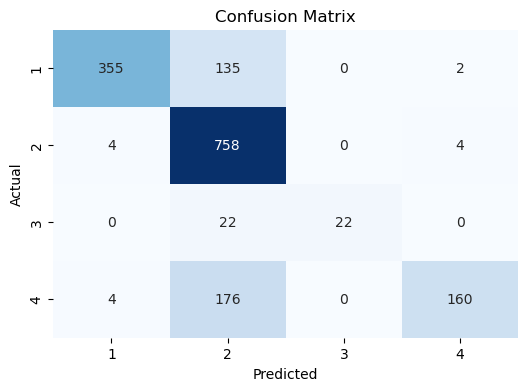

In [36]:
# RANDOM FOREST
print(colored("RANDOM FOREST FOR PREFIX 7", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_rf = {
    'n_estimators': [100],  #100, 200 
    'criterion': ['entropy'], # 'gini', 'entropy'
    'max_depth': [5, 6], #5, 7, 10
    'min_samples_split': [5], # 2, 5, 10
    'min_samples_leaf': [1], # 1, 2, 4
    'max_features': ['sqrt'] # 'auto', 'sqrt', 'log2'
}

# Initialize the Decision Tree model
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

CATBOOST FOR PREFIX 7
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'border_count': 32, 'depth': 3, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'verbose': False}

Best cross-validation score: 0.8561

Training accuracy: 0.8835 VS Validation accuracy: 0.8350

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.80      0.88       492
           2       0.80      0.89      0.85       766
           3       0.76      0.70      0.73        44
           4       0.76      0.77      0.77       340

    accuracy                           0.83      1642
   macro avg       0.82      0.79      0.80      1642
weighted avg       0.84      0.83      0.84      1642


Confusion Matrix:


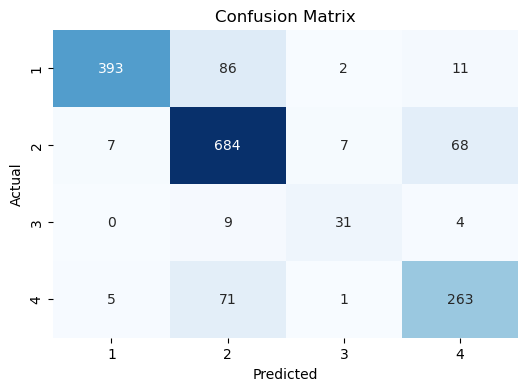

In [37]:
# CATBOOST
print(colored("CATBOOST FOR PREFIX 7", attrs=['bold']))

# Define the parameter grid for CatBoost
param_grid_cb = {
    'iterations': [200],  # 100, 200
    'depth': [3],  # 5, 7, 10
    'learning_rate': [0.1],  # 0.1, 0.01
    'l2_leaf_reg': [3],  # 3, 5, 7
    'border_count': [32],  # 32, 64, 128
    'verbose': [False]
}

# Initialize the CatBoost model
clf = CatBoostClassifier(random_state=42, verbose=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_cb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']), colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfusion Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)


**Predicting Final Outcome after the sixth task ended** *[prefix 7]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Random Forest*      |  0.83 | 0.82 | 0.67 | 0.63 | 0.814 | 3.40% |
| *CatBoost*        | 0.88  | 0.85 | 0.73 | 0.77 | 0.856 | 4.85% |


* *Gradient Boosting* showed greate promise for good results, but each iterations takes huge ammounts of time to run, so we sacrifice the possible improvement (small) to faster runs


<hr>

<a class="anchor" id="2_8">

## 2.8. Prefix #8

</a>

In [38]:
# Splitting features and target
X = prefix_8.drop("Outcome", axis=1)  # Features
y = prefix_8['Outcome']     # Target

# Splitting data into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Data for Extreme Gradient Boosting
y_train_adjusted = y_train - 1
y_valid_adjusted = y_valid - 1

In [39]:
# Initialize and evaluate different models
print(colored("DECISION TREE MODEL FOR PREFIX 8", attrs=['bold']))
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nRANDOM FOREST MODEL FOR PREFIX 8", attrs=['bold']))
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nNAIVE BAIVES MODEL FOR PREFIX 8", attrs=['bold']))
nb_clf = GaussianNB()
evaluate_model(nb_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLOGISTIC REGRESSION MODEL FOR PREFIX 8", attrs=['bold']))
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nGRADIENT BOOSTING MODEL FOR PREFIX 8", attrs=['bold']))
gbm_clf = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nLIGHTGBM MODEL FOR PREFIX 8", attrs=['bold']))
lgbm_clf = LGBMClassifier(random_state=42, verbose=-2)
evaluate_model(lgbm_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nEXTREME GRADIENT BOOSTING MODEL FOR PREFIX 8", attrs=['bold']))
xgb_clf = XGBClassifier(random_state=42)
evaluate_model(xgb_clf, X_train, y_train_adjusted, X_valid, y_valid_adjusted)

print(colored("\nCATBOOST MODEL FOR PREFIX 8", attrs=['bold']))
cat_clf = CatBoostClassifier(random_state=42, verbose=False)
evaluate_model(cat_clf, X_train, y_train, X_valid, y_valid)

print(colored("\nADA BOOST MODEL FOR PREFIX 8", attrs=['bold']))
ada_clf = AdaBoostClassifier(random_state=42)
evaluate_model(ada_clf, X_train, y_train, X_valid, y_valid)

DECISION TREE MODEL FOR PREFIX 8
Training accuracy: 1.0000 VS Validation accuracy: 0.8083

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       279
           2       0.82      0.85      0.83       454
           3       0.79      0.79      0.79        38
           4       0.74      0.68      0.71       189

    accuracy                           0.81       960
   macro avg       0.80      0.79      0.79       960
weighted avg       0.81      0.81      0.81       960


Confusion Matrix:
[[233  35   1  10]
 [ 32 384   6  32]
 [  2   3  30   3]
 [ 14  45   1 129]]

RANDOM FOREST MODEL FOR PREFIX 8
Training accuracy: 1.0000 VS Validation accuracy: 0.8458

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.96      0.83      0.89       279
           2       0.80      0.94      0.87       454
           3       0.93      0.71      0.81

CATBOOST FOR PREFIX 8
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters: {'border_count': 32, 'depth': 3, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'verbose': False}

Best cross-validation score: 0.8606

Training accuracy: 0.8910 VS Validation accuracy: 0.8521

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.97      0.82      0.89       279
           2       0.81      0.94      0.87       454
           3       0.86      0.79      0.82        38
           4       0.82      0.71      0.76       189

    accuracy                           0.85       960
   macro avg       0.86      0.81      0.84       960
weighted avg       0.86      0.85      0.85       960


Confusion Matrix:


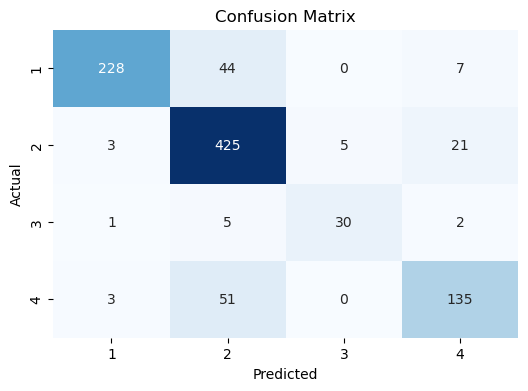

In [40]:
# CATBOOST
print(colored("CATBOOST FOR PREFIX 8", attrs=['bold']))

# Define the parameter grid for CatBoost
param_grid_cb = {
    'iterations': [200],  # 100, 200
    'depth': [3],  # 5, 7, 10
    'learning_rate': [0.1],  # 0.1, 0.01
    'l2_leaf_reg': [3],  # 3, 5, 7
    'border_count': [32],  # 32, 64, 128
    'verbose': [False]
}

# Initialize the CatBoost model
clf = CatBoostClassifier(random_state=42, verbose=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_cb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train, predictions_train)
valid_accuracy = accuracy_score(y_valid, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']), colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid, predictions_valid))

print(colored("\nConfusion Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid, predictions_valid)

EXTREME GRADIENT BOOSTING FOR PREFIX 6
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 200}

Best cross-validation score: 0.8579

Training accuracy: 0.9080 VS Validation accuracy: 0.8531

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       279
           1       0.82      0.94      0.87       454
           2       0.91      0.82      0.86        38
           3       0.80      0.71      0.75       189

    accuracy                           0.85       960
   macro avg       0.87      0.82      0.84       960
weighted avg       0.86      0.85      0.85       960


Confuision Matrix:


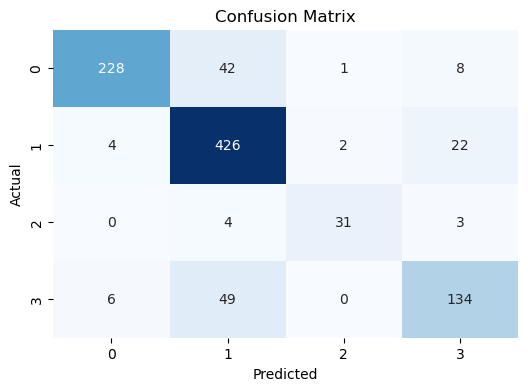

In [41]:
# EXTREME GRADIENT BOOSTING IMPROVEMENT
print(colored("EXTREME GRADIENT BOOSTING FOR PREFIX 6", attrs=['bold']))

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1], #0.1, 0.01
    'n_estimators': [100,200],  #100, 200 
    'max_depth': [2], #5, 7, 10
    'min_child_weight': [1,3], #1,3, 5
    'gamma': [0.1]# 0, 0.1, 0.2
}

# Initialize the Decision Tree model
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(colored("\nBest parameters:", attrs=['bold']), f"{best_params}")
print(colored("\nBest cross-validation score:", attrs=['bold']), f"{best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Get Predictions
predictions_train = best_model.predict(X_train)
predictions_valid = best_model.predict(X_valid)

# Evaluate Overfit
train_accuracy = accuracy_score(y_train_adjusted, predictions_train)
valid_accuracy = accuracy_score(y_valid_adjusted, predictions_valid)
print(colored("\nTraining accuracy:", attrs=['bold']), f"{train_accuracy:.4f}", colored("VS", color="blue", attrs=['bold']) ,colored("Validation accuracy:", attrs=['bold']), f"{valid_accuracy:.4f}")

print(colored("\nClassification Report (Validation Set):", attrs=['bold']))
print(classification_report(y_valid_adjusted, predictions_valid))

print(colored("\nConfuision Matrix:", attrs=['bold']))
cf.confus_matrix(y_valid_adjusted, predictions_valid)

**Predicting Final Outcome after the seventh task ended** *[prefix 8]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *CatBoost*        | 0.89  | 0.87 | 0.82 | 0.76 | 0.861 | 3.89% |
| *XGBoost*      |  0.88 | 0.87 | 0.86 | 0.75 |0.858 | 5.49% |


* *Gradient Boosting* showed greate promise for good results, but each iterations takes huge ammounts of time to run, so we sacrifice the possible improvement (small) to faster runs


<hr>

<a class="anchor" id="3">

# 3. Recap

</a>

**NOTES:**
* Although we choose 2/3 models for each prefix dataset, either XGBoost, CatBoost, and Light GBM presented very similar results with small difereces on the cross-validation score or in the difference between train and validation dataset (overfit)
* *Gradient Boosting* showed great promise for good results, but each iterations takes huge ammounts of time to run, so we sacrifice the possible improvement (small) to faster runs
* From prefix 6 all models have diminushing support, meaning that there is less data to support the results, for this reason we believe it did not make sense to continue pass that
* Unfortenely we didnt found a way to integrate the lenght of the process in the model, since that requires knowing the future lenght and end of a process. Also, in case a process repeats or enters a loop is marked in the index of Activities/Actions
* Each outcome score is measures using F1-SCORE
* The cross-validation score is measure using ACCURACY
* Overfit is the different between TRAIN and VALIDATION

**Predicting Final Outcome before the process is picked up by a team** *[prefix 1]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------|-----------|
| *Light GBM*      |  0.84 | 0.46 | 0.95 | 0.73 | 0.698 | 1.17% |
| *XGBoost*        |  0.84 | 0.47 | 0.95 | 0.73 | 0.695 | 1.46% |

**Predicting Final Outcome after first task ended** *[prefix 2]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------|  -----------|
| *XGBoost*        |  0.86 | 0.70 | 0.95 | 0.81 | 0.793 | 6% |
| *Forest Forest*      |  0.84 | 0.49 | 0.94 | 0.74 | 0.698 | 0.52%|

**Predicting Final Outcome after the second task ended** *[prefix 3]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Light GBM*      |  0.86 | 0.71 | 0.96 | 0.81 | 0.793 | 13.7% |
| *XGBoost*        |  0.86 | 0.69 | 0.96 | 0.81 | 0.787 | 7.55% |

**Predicting Final Outcome after the third task ended** *[prefix 4]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Light GBM*      |  0.86 | 0.68 | 0.97 | 0.82 | 0.799 | 2.88% |
| *XGBoost*        |  0.87 | 0.69 | 0.97 | 0.82 | 0.804 | 3.45% |


**Predicting Final Outcome after the forth task ended** *[prefix 5]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Random Forest*      |  0.89 | 0.89 | 0.86 | 0.94 | 0.905 | ~0% |
| *Light GBM*      |  0.91 | 0.91 | 0.91 | 0.96 | 0.925 | 3.63% |
| *Gradient Boosting*        |  0.90 | 0.91 | 0.88 | 0.95 | 0.919 | 0.05% |


**Predicting Final Outcome after the fifth task ended** *[prefix 6]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Random Forest*      |  0.95 | 0.93 | 0.78 | 0.73 | 0.919 | 1.16% |
| *Light GBM*      |  0.96 | 0.94 | 0.84 | 0.80 | 0.931 | 1.94% |
| *XGBoost*        | 0.96  | 0.94 | 0.90 | 0.80 | 0.931 | 1.90% |

**Predicting Final Outcome after the sixth task ended** *[prefix 7]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *Random Forest*      |  0.83 | 0.82 | 0.67 | 0.63 | 0.814 | 3.40% |
| *CatBoost*        | 0.88  | 0.85 | 0.73 | 0.77 | 0.856 | 4.85% |


**Predicting Final Outcome after the seventh task ended** *[prefix 8]*

| Model          | Request Finish | Closed Administrative | Request Canceled | Closed Ad. Rquester Rej. Acc. Impact | *Cross-Validation Score* | *Overfit* |
|----------------|-----------|-----------|-----------|-----------| -----------| -----------|
| *CatBoost*        | 0.89  | 0.87 | 0.82 | 0.76 | 0.861 | 3.89% |
| *XGBoost*      |  0.88 | 0.87 | 0.86 | 0.75 |0.858 | 5.49% |

